In [1]:
from os.path import join
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob
import os
from skimage.io import imread
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import ndimage
from skimage.morphology import square, dilation
%matplotlib inline

import utils
from utils import read_img_join_masks, add_contour, show_with_contour, iou_metric, show_img, diagnose_errors

img_id = 'ed5be4b63e9506ad64660dd92a098ffcc0325195298c13c815a73773f1efc279'
img, mask = read_img_join_masks(img_id)
#mask2 = plt.contour(mask.astype(float), alpha=0.5)
#print mask2S
#print np.amax(mask)
#show_with_contour(img,mask)
#


In [6]:

mask2 = np.copy(mask)
#mask2 = scipy.ndimage.interpolation.shift(mask, 3)
#mask2 = dilation(mask2, square(3))
mask2 = ndimage.binary_erosion(mask2, structure=np.ones((1,1))).astype(mask2.dtype)
mask2, nf = scipy.ndimage.measurements.label(mask2)
print 'objects', nf, len(np.unique(mask))
#print 'iou', iou_metric(mask2, mask)
print 'diagnose'
diagnose_errors(mask, mask2)


objects 32 43
diagnose
loc 39 0 3
[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.36557789  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.80730223  0. 

(0.72093023255813948, 0.90697674418604646, 0.7209302325581395, 1.0, 0.0, 0.0)

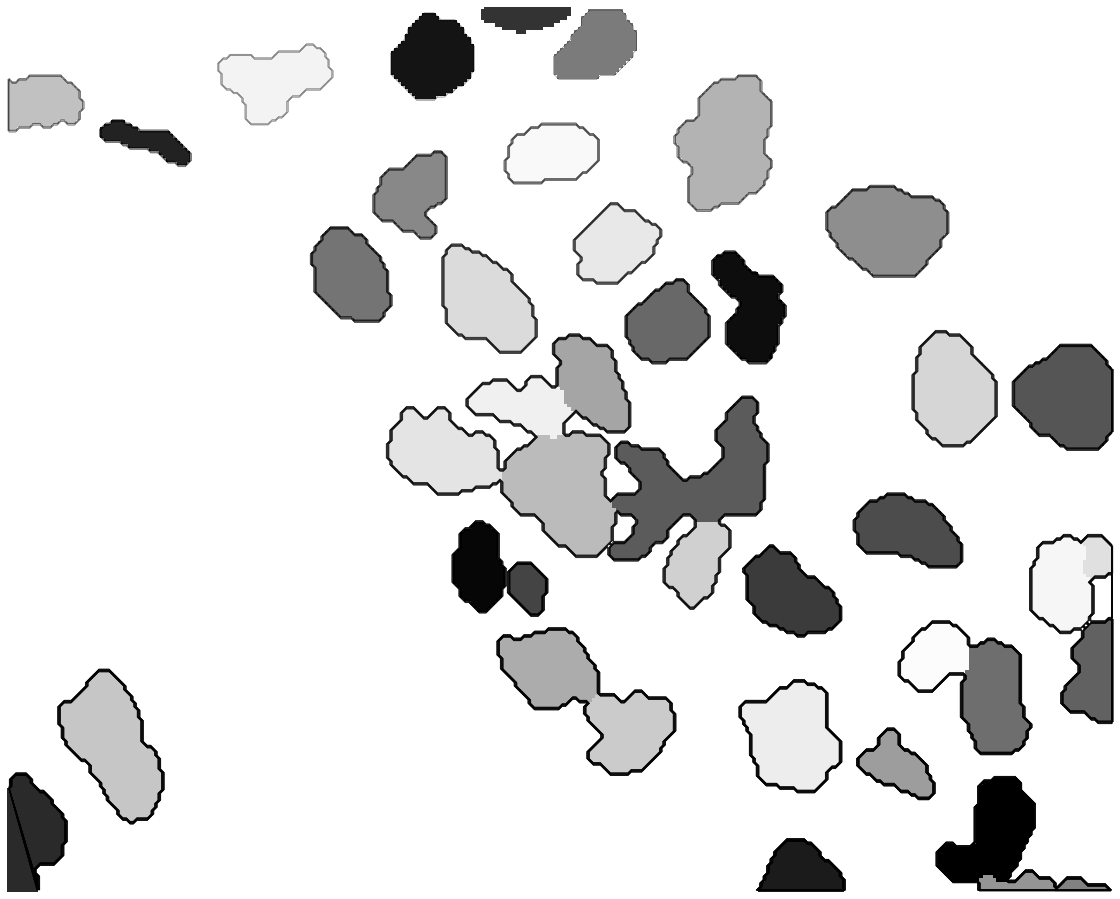

In [9]:
show_with_contour(mask,mask2)